In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [3]:
df.drop(columns=['label','Unnamed: 0'], inplace=True)
df.rename(columns={'label_num':'spam'}, inplace=True)
df.head()

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.head()

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   spam    5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [6]:
df.duplicated().sum()

np.int64(178)

In [7]:
df.isnull().sum()

,0
text,0
spam,0


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4993 non-null   object
 1   spam    4993 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.0+ KB


## 2. EDA(Exploratory Data Analysis)

In [10]:
df['spam'].value_counts()

,count
spam,
0,3531
1,1462


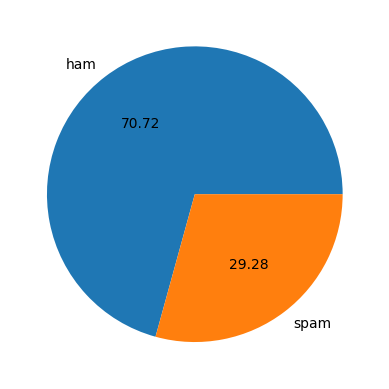

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [12]:
# Data is imbalanced

In [13]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df['num_characters'] = df['text'].apply(len)

In [15]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [18]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [19]:
# Ham
df[df['spam']==0].describe()

,spam,num_characters,num_words,num_sentences
count,3531.0,3531.000000,3531.000000,3531.000000
mean,0.0,994.939394,230.516001,11.662419
std,0.0,1402.785831,337.018933,25.330035
min,0.0,18.000000,3.000000,1.000000
25%,0.0,241.000000,53.000000,4.000000
50%,0.0,538.000000,128.000000,7.000000
75%,0.0,1253.500000,298.500000,13.500000
max,0.0,32258.000000,8863.000000,1204.000000


In [20]:
# Spam
df[df['spam']==1].describe()

,spam,num_characters,num_words,num_sentences
count,1462.0,1462.000000,1462.000000,1462.000000
mean,1.0,1249.326265,241.315321,17.551984
std,0.0,1840.112883,349.439381,33.111447
min,1.0,11.000000,2.000000,1.000000
25%,1.0,304.250000,60.000000,4.000000
50%,1.0,589.000000,119.500000,9.000000
75%,1.0,1305.000000,252.750000,19.000000
max,1.0,22073.000000,3963.000000,693.000000


In [21]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [22]:
import seaborn as sns

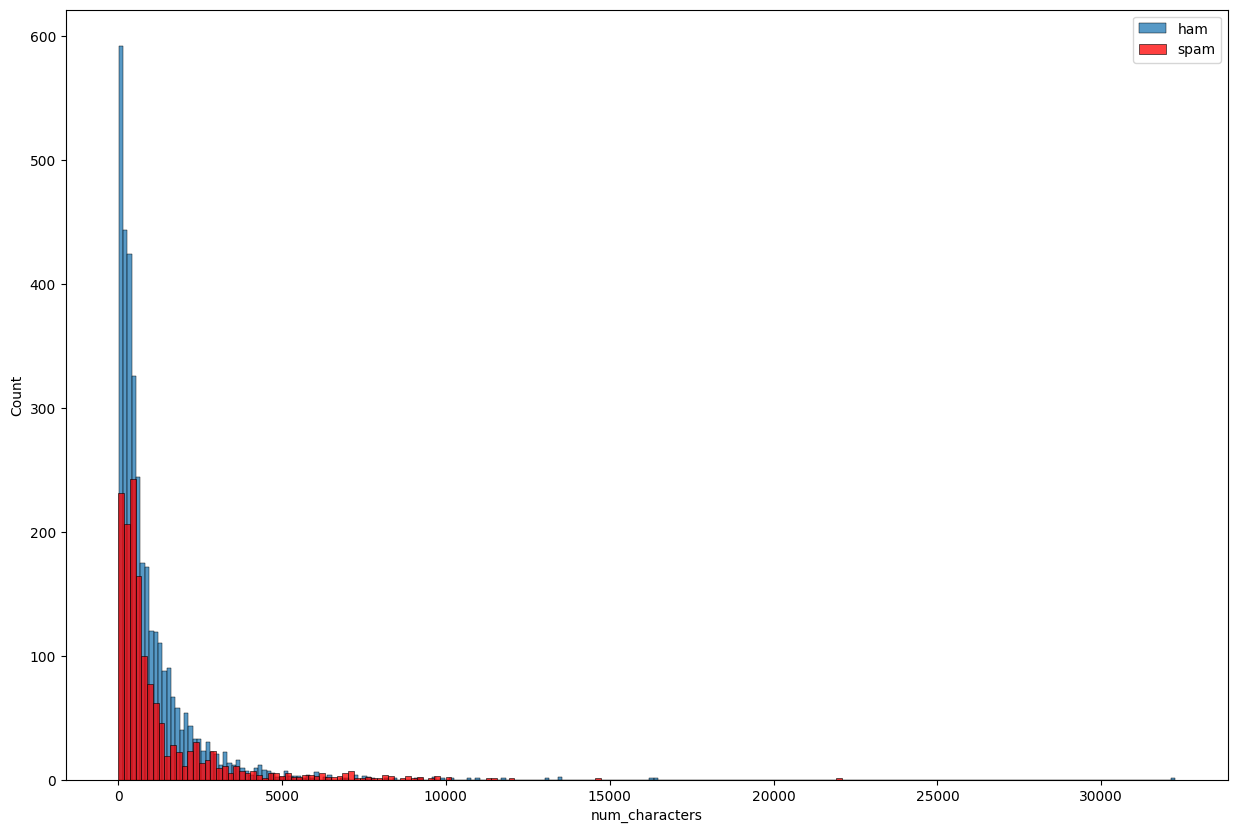

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam']==0]['num_characters'])
sns.histplot(df[df['spam']==1]['num_characters'], color='red')
plt.legend(['ham','spam'])
plt.show()

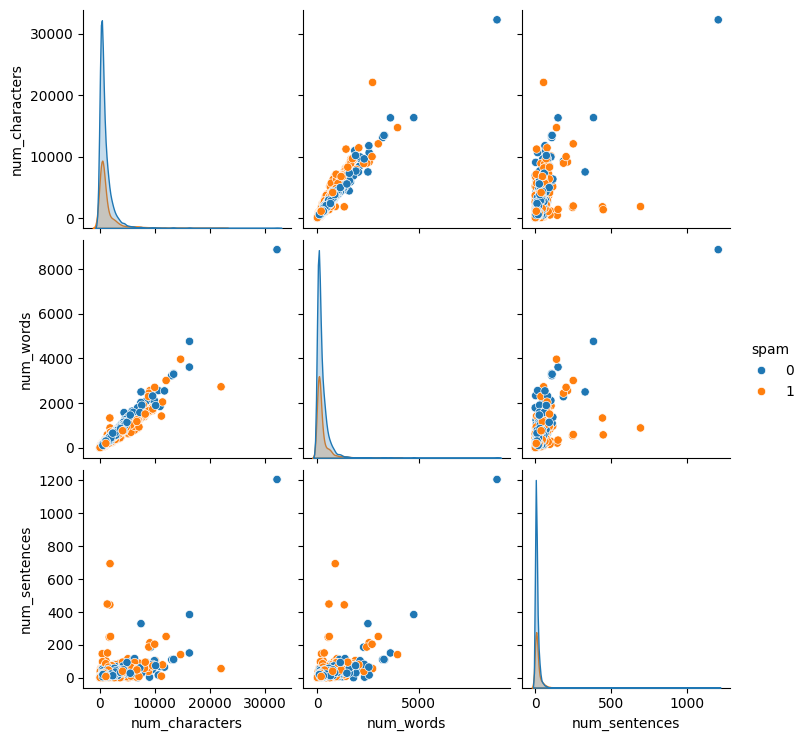

In [24]:
sns.pairplot(df, hue='spam')

<Axes: >

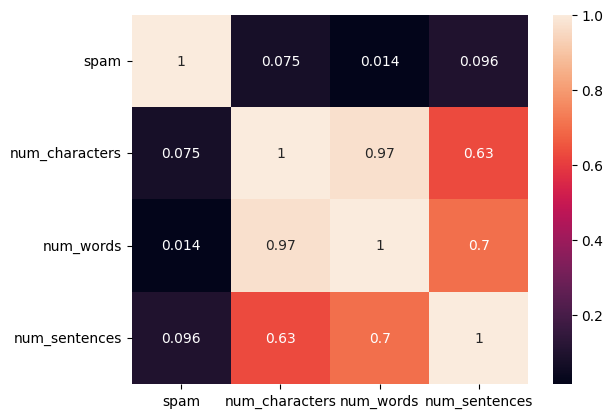

In [25]:
df1 = df.drop(columns=['text'],axis=1)
sns.heatmap(df1.corr(), annot=True)

## 3. Data Preprocessing

<ul><li>Lowe Case</li>
<li>Remove all HTML-Tag </li>
<li>Tokenization</li>
<li>Removing special characters</li>
<li>Removing stop words and punctuation </li>
<li>Stemming</li>
</ul>


In [26]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
def transform_text(text):
  #Remove HTML tags
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()

  #Lower Case
  text = text.lower()

  # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', 'urls', text)

  # Tokenization
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in (set(stopwords.words('english'))-{'not'})and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [28]:
df['transformed_text'] = df['text'].apply(transform_text)

In [29]:
print(df['text'][0])
print(df['transformed_text'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos


In [30]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='Black')

In [32]:
spam_wc = wc.generate(df[df['spam']==1]['transformed_text'].str.cat(sep=' '))

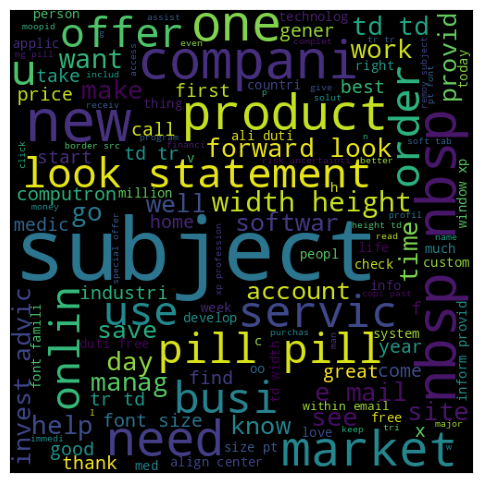

In [33]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

In [34]:
ham_wc = wc.generate(df[df['spam']==0]['transformed_text'].str.cat(sep=' '))

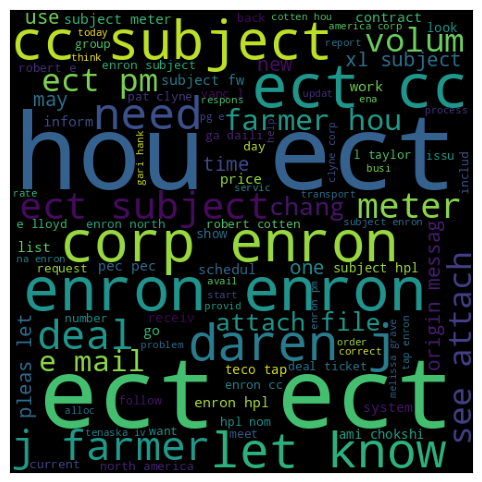

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

In [36]:
df.head(3)

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...


In [37]:
spam_corpus = []
for email in df[df['spam']==1]['transformed_text'].tolist():
  for word in email.split():
    spam_corpus.append(word)

In [38]:
len(spam_corpus)

197667

<ipython-input-39-dd3fc2569ded>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam1, y=spam2,palette='rocket')


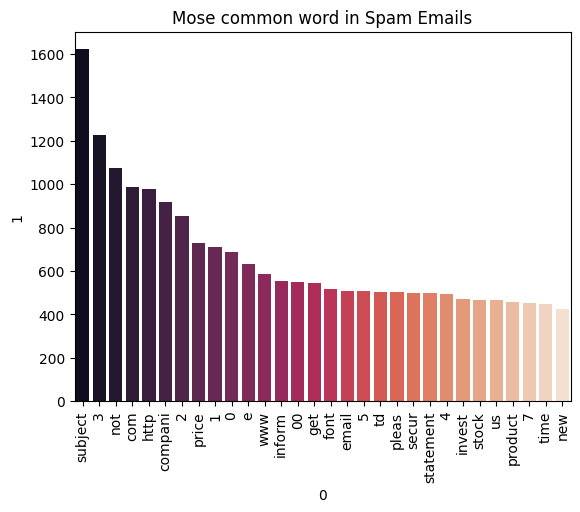

In [39]:
from collections import Counter
spam1 = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
spam2 = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=spam1, y=spam2,palette='rocket')
plt.xticks(rotation='vertical')
plt.title('Mose common word in Spam Emails')
plt.show()

In [40]:
ham_corpus = []
for email in df[df['spam']==0]['transformed_text'].tolist():
  for word in email.split():
    ham_corpus.append(word)

<ipython-input-41-ada9f5ed01cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ham1, y=ham2,palette='rocket')


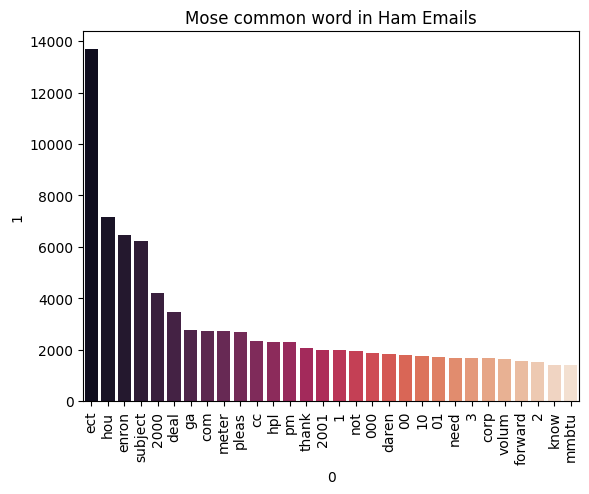

In [41]:
from collections import Counter
ham1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
ham2 = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
sns.barplot(x=ham1, y=ham2,palette='rocket')
plt.xticks(rotation='vertical')
plt.title('Mose common word in Ham Emails')
plt.show()

## 4. Model Building

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(ngram_range=(1,2),max_features=24000)
tfidf = TfidfVectorizer(max_features=24000)

In [43]:
x1 = cv.fit_transform(df['transformed_text']).toarray()
x2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
print(x1.shape)
print(x2.shape)

(4993, 24000)
(4993, 24000)


In [45]:
y = df['spam'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,test_size=0.2,random_state=42)
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
gnb.fit(x1_train,y1_train)
y1_pred = gnb.predict(x1_test)
print('Accuracy Score: ',accuracy_score(y1_test,y1_pred))
print('Precision Score: ',precision_score(y1_test,y1_pred))
print('Confusion Matrix: \n',confusion_matrix(y1_test,y1_pred))

Accuracy Score:  0.970970970970971
Precision Score:  0.9407407407407408
Confusion Matrix: 
 [[716  16]
 [ 13 254]]


In [51]:
gnb.fit(x2_train,y2_train)
y2_pred = gnb.predict(x2_test)
print('Accuracy Score: ',accuracy_score(y2_test,y2_pred))
print('Precision Score: ',precision_score(y2_test,y2_pred))
print('Confusion Matrix: \n',confusion_matrix(y2_test,y2_pred))

Accuracy Score:  0.9419419419419419
Precision Score:  0.88
Confusion Matrix: 
 [[699  33]
 [ 25 242]]


In [52]:
mnb.fit(x1_train,y1_train)
y1_pred = mnb.predict(x1_test)
print('Accuracy Score: ',accuracy_score(y1_test,y1_pred))
print('Precision Score: ',precision_score(y1_test,y1_pred))
print('Confusion Matrix: \n',confusion_matrix(y1_test,y1_pred))

Accuracy Score:  0.9679679679679679
Precision Score:  0.9065743944636678
Confusion Matrix: 
 [[705  27]
 [  5 262]]


In [53]:
mnb.fit(x2_train,y2_train)
y2_pred = mnb.predict(x2_test)
print('Accuracy Score: ',accuracy_score(y2_test,y2_pred))
print('Precision Score: ',precision_score(y2_test,y2_pred))
print('Confusion Matrix: \n',confusion_matrix(y2_test,y2_pred))

Accuracy Score:  0.958958958958959
Precision Score:  0.991304347826087
Confusion Matrix: 
 [[730   2]
 [ 39 228]]


In [54]:
bnb.fit(x1_train,y1_train)
y1_pred = bnb.predict(x1_test)
print('Accuracy Score: ',accuracy_score(y1_test,y1_pred))
print('Precision Score: ',precision_score(y1_test,y1_pred))
print('Confusion Matrix: \n',confusion_matrix(y1_test,y1_pred))

Accuracy Score:  0.948948948948949
Precision Score:  0.9060150375939849
Confusion Matrix: 
 [[707  25]
 [ 26 241]]


In [55]:
bnb.fit(x2_train,y2_train)
y2_pred = bnb.predict(x2_test)
print('Accuracy Score: ',accuracy_score(y2_test,y2_pred))
print('Precision Score: ',precision_score(y2_test,y2_pred))
print('Confusion Matrix: \n',confusion_matrix(y2_test,y2_pred))

Accuracy Score:  0.8998998998998999
Precision Score:  0.8957345971563981
Confusion Matrix: 
 [[710  22]
 [ 78 189]]


In [56]:
# Accuracy Score:  0.958958958958959
# Precision Score:  0.991304347826087
# Confusion Matrix:
#  [[730   2]
#  [ 39 228]]

In [57]:
!pip install xgboost

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_jobs=-1)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1',n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=50, random_state=2,n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2,n_jobs=-1)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2,n_jobs=-1)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2,n_jobs=-1)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [62]:
train_classifier(svc,x2_train,y2_train,x2_test,y2_test)

(0.980980980980981, 0.9460431654676259)

In [63]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, x2_train,y2_train,x2_test,y2_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.980980980980981
Precision -  0.9460431654676259
For  KN
Accuracy -  0.970970970970971
Precision -  0.96484375
For  NB
Accuracy -  0.958958958958959
Precision -  0.991304347826087
For  DT
Accuracy -  0.8378378378378378
Precision -  0.628992628992629


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


For  LR
Accuracy -  0.950950950950951
Precision -  0.8585526315789473
For  RF
Accuracy -  0.9769769769769769
Precision -  0.9518518518518518
For  AdaBoost
Accuracy -  0.9179179179179179
Precision -  0.7881619937694704
For  BgC
Accuracy -  0.960960960960961
Precision -  0.9222222222222223
For  ETC
Accuracy -  0.96996996996997
Precision -  0.9340659340659341
For  GBDT
Accuracy -  0.94994994994995
Precision -  0.872852233676976
For  xgb
Accuracy -  0.963963963963964
Precision -  0.9024390243902439


In [64]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [65]:
performance_df1

,Algorithm,Accuracy,Precision
2,NB,0.958959,0.991304
1,KN,0.970971,0.964844
5,RF,0.976977,0.951852
0,SVC,0.980981,0.946043
8,ETC,0.969970,0.934066
7,BgC,0.960961,0.922222
10,xgb,0.963964,0.902439
9,GBDT,0.949950,0.872852
4,LR,0.950951,0.858553
6,AdaBoost,0.917918,0.788162


In [66]:
# MinMax Scaleing

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x2_scaler = scaler.fit_transform(x2)

In [68]:
y = df['spam'].values

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x2_scaler,y,test_size=0.2,random_state = 42)

In [70]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

Accuracy Score:  0.9719719719719719
Precision Score:  0.9649805447470817
Confusion Matrix: 
 [[723   9]
 [ 19 248]]


In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))